In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_excel('all_companies.xlsx')
df.drop(df.index[-2:], inplace=True)

# 上证综指走势

# 数据检查

In [25]:
df[df.isna().values]

,证券代码,证券简称,所属申万行业名称 [行业级别] 一级行业,所属申万行业名称 [行业级别] 二级行业,上市日期,总市值1 [交易日期] 2019-12-31 [单位] 亿元,市盈率PE(TTM) [交易日期] 2019-12-31 [单位] 倍,区间涨跌幅 [起始交易日期] 2019-01-01 [截止交易日期] 2019-12-31 [单位] %,最新价较区间最高价跌幅(回撤) [起始交易日期] 2019-01-01 [截止交易日期] 2019-12-31 [单位] %
412,000939.SZ,*ST凯迪,公用事业,电力,1999-09-23,41.2608,NaN,-13.2231,-23.3577
450,000995.SZ,*ST皇台,食品饮料,饮料制造,2000-08-07,13.2524,NaN,42.5573,-15.1136
716,002260.SZ,*ST德奥,家用电器,白色家电,2008-07-16,8.3538,NaN,-2.7778,-20.8543
1058,002604.SZ,*ST龙力,农林牧渔,农产品加工,2011-07-28,11.7514,NaN,18.0723,-24.0310
1431,300028.SZ,金亚科技,通信,通信设备,2009-10-30,2.6486,NaN,0.0000,0.0000
1506,300104.SZ,乐视网,传媒,互联网传媒,2010-08-12,67.4215,NaN,-32.1285,-49.8516
1617,300216.SZ,千山药机,机械设备,专用设备,2011-05-11,13.7707,NaN,-0.5222,-26.4479
2250,600074.SH,*ST保千,电子,其他电子Ⅱ,1997-06-23,25.3540,NaN,-13.3333,-25.7143
2694,600610.SH,*ST毅达,建筑装饰,园林工程Ⅱ,1992-08-05,27.6112,NaN,89.5349,-31.6562


In [22]:
df.isna().sum()

证券代码                                                                       0
证券简称                                                                       0
所属申万行业名称\r\n[行业级别] 一级行业                                                    0
所属申万行业名称\r\n[行业级别] 二级行业                                                    0
上市日期                                                                       0
总市值1\r\n[交易日期] 2019-12-31\r\n[单位] 亿元                                       0
市盈率PE(TTM)\r\n[交易日期] 2019-12-31\r\n[单位] 倍                                  9
区间涨跌幅\r\n[起始交易日期] 2019-01-01\r\n[截止交易日期] 2019-12-31\r\n[单位] %              0
最新价较区间最高价跌幅(回撤)\r\n[起始交易日期] 2019-01-01\r\n[截止交易日期] 2019-12-31\r\n[单位] %    0
dtype: int64

In [4]:
df.isna().sum()

证券代码                                                                        1
证券简称                                                                        2
所属申万行业名称\r\n[行业级别] 一级行业                                                     2
所属申万行业名称\r\n[行业级别] 二级行业                                                     2
上市日期                                                                        2
总市值1\r\n[交易日期] 2019-12-31\r\n[单位] 亿元                                        2
市盈率PE(TTM)\r\n[交易日期] 2019-12-31\r\n[单位] 倍                                  11
区间涨跌幅\r\n[起始交易日期] 2019-01-01\r\n[截止交易日期] 2019-12-31\r\n[单位] %               2
最新价较区间最高价跌幅(回撤)\r\n[起始交易日期] 2019-01-01\r\n[截止交易日期] 2019-12-31\r\n[单位] %     2
dtype: int64

# 整体市场

## 市值分布

In [5]:
label=['0-20','20-30','30-50','50-75','75-100','100-200','200-500','>500']

fanwei = [0,20,30,50,75,100,200,500,1e6]

In [20]:
def cal_range(df):
    freq={}
    for i in range(len(fanwei)-1):
        freq[label[i]]=((df.iloc[:,5]<fanwei[i+1]) & (df.iloc[:,5]>fanwei[i])).sum()
        
    return freq
freq=cal_range(df)

<BarContainer object of 8 artists>

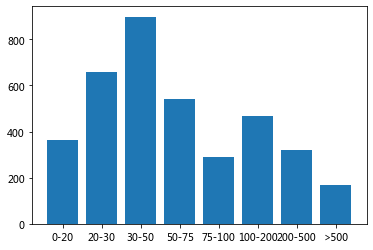

In [21]:

plt.bar( label, list(freq.values()))

## 今年上市新股数量

In [22]:
new_company=df[df.iloc[:,4]>(pd.to_datetime('20181231'))].copy()

In [23]:
print('今年新股发行数量：{}'.format(new_company.shape[0]))
print('当前新股总市值：{:.0f} 亿'.format(new_company.iloc[:,5].sum()))

今年新股发行数量：161
当前新股总市值：21152 亿


# 分市场情况

In [24]:
SH_market = df[df.iloc[:,0].apply(lambda x: x[0]=='6')]

SZ_market = df[df.iloc[:,0].apply(lambda x: x[0]=='0')]

CY_market= df[df.iloc[:,0].apply(lambda x: x[0]=='3')]

## 股票数量及市值分布

In [25]:
print('''上证市场股票数量：{}\n
深证市场股票数量: {}\n
创业板股票数量: {}'''.format(SH_market.shape[0],SZ_market.shape[0],CY_market.shape[0]))

上证市场股票数量：1540

深证市场股票数量: 1402

创业板股票数量: 779


In [26]:
print('''上证市场股票市值：{:.0f} 亿\n
深证市场股票市值: {:.0f} 亿\n
创业板股票市值: {:.0f} 亿'''.format(SH_market.iloc[:,5].sum(),SZ_market.iloc[:,5].sum(),CY_market.iloc[:,5].sum()))

上证市场股票市值：376883 亿

深证市场股票市值: 165781 亿

创业板股票市值: 56260 亿


## 平均市值、中位数

In [14]:
def stat_test(x):
    mean = np.mean(x.iloc[:,5].dropna())
    median= np.median((x.iloc[:,5].dropna()))
    return mean,median

In [15]:
print('''上证市场平均市值：{:.0f} 亿
上证市场中位数: {:.0f} 亿 \n
深证市场平均市值：{:.0f} 亿
深证市场中位数: {:.0f} 亿 \n
创业板市场平均市值：{:.0f} 亿
创业板市场中位数: {:.0f} 亿 
'''.format(*stat_test(SH_market),*stat_test(SZ_market),*stat_test(CY_market)))

上证市场平均市值：247 亿
上证市场中位数: 57 亿 

深证市场平均市值：118 亿
深证市场中位数: 48 亿 

创业板市场平均市值：72 亿
创业板市场中位数: 37 亿 



# 分行业

In [27]:
Industry = pd.pivot_table(df,values=[df.columns[5]], index=[df.columns[2]],aggfunc=[np.sum])

Industry.sort_values(by=[Industry.columns[0]], ascending=False, inplace=True)

<BarContainer object of 28 artists>

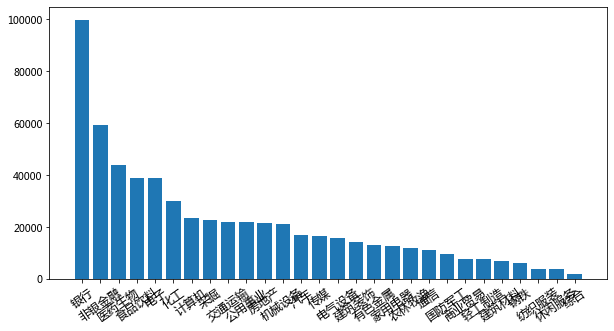

In [28]:
plt.figure(figsize=(10, 5))
plt.tick_params(axis='x', labelsize=12) 
plt.xticks(rotation=35) 
plt.bar( Industry.index, Industry.iloc[:,0])

In [35]:
Industry = pd.pivot_table(df,values=[df.columns[5]], index=[df.columns[2],df.columns[3]],aggfunc=[np.sum])

# FourIndustry.sort_values(by=[Industry.columns[0]], ascending=False, inplace=True)

In [36]:
Industry.head()

sum
                                                总市值1\r\n[交易日期] 2019-10-31\r\n[单位] 亿元
所属申万行业名称\r\n[行业级别] 一级行业 所属申万行业名称\r\n[行业级别] 二级行业                                     
交通运输                    公交Ⅱ                                                 343.2379
                        机场Ⅱ                                                2106.8362
                        港口Ⅱ                                                4211.7556
                        物流Ⅱ                                                5704.5363
                        航空运输Ⅱ                                              3719.8565

In [32]:
Finance=['银行','非银金融','房地产']

TMT = ['传媒','计算机','电子','通信']

Consumption = ['家用电器','纺织服装','轻工制造','商业贸易','农林牧渔','食品饮料','休闲服务','公用事业','医药生物']

Circle = ['采掘','化工','钢铁','有色金属','建筑材料','建筑装饰','电气设备','机械设备','国防军工','交通运输','汽车','综合']

def MyIndustry(df):
    if df[2] in Finance:
        return '大金融'
    elif df[2] in TMT:
        return 'TMT'
    elif df[2] in Consumption:
        return '大消费'
    elif df[2] in Circle:
        return '大周期'

In [37]:
df['MyIndustry']=df.apply(MyIndustry,axis=1)


In [42]:
FourIndustry = pd.pivot_table(df,values=[df.columns[5]], index=[df.columns[8],df.columns[2],df.columns[3]],aggfunc=[np.sum])

# FourIndustry.sort_values(by=[Industry.columns[0]], ascending=False, inplace=True)

能否按二级行业顺序

In [45]:
FourIndustry.head()

sum
                                                           总市值1\r\n[交易日期] 2019-10-31\r\n[单位] 亿元
MyIndustry 所属申万行业名称\r\n[行业级别] 一级行业 所属申万行业名称\r\n[行业级别] 二级行业                                     
TMT        传媒                      互联网传媒                                              7145.0031
                                   文化传媒                                               6796.3604
                                   营销传播                                               2288.0954
           电子                      元件Ⅱ                                                5666.7002
                                   光学光电子                                              7562.8642

In [53]:
import tushare as ts

Index = ts.pro_bar(ts_code='000001.SH', asset='I', 
               start_date='2019-01-01', end_date='2019-12-31').close[::-1].values

In [ ]:
Index

In [54]:
Index.close[::-1].values

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000001.SH,20191231,3050.1240,3036.3858,3051.6770,3030.5122,3040.0239,10.1001,0.3322,217429022.0,226763991.3
1,000001.SH,20191230,3040.0239,2998.1689,3041.3969,2983.3436,3005.0355,34.9884,1.1643,248066530.0,267382994.4
2,000001.SH,20191227,3005.0355,3006.8517,3036.1127,3003.6309,3007.3546,-2.3191,-0.0771,247102779.0,258118739.4
3,000001.SH,20191226,3007.3546,2981.2485,3007.3546,2980.3966,2981.8805,25.4741,0.8543,182440426.0,195586079.1
4,000001.SH,20191225,2981.8805,2980.4276,2988.2924,2970.6572,2982.6806,-0.8001,-0.0268,175654028.0,189608562.7
5,000001.SH,20191224,2982.6806,2965.8258,2983.8194,2960.6839,2962.7513,19.9293,0.6727,163030250.0,167366667.3
6,000001.SH,20191223,2962.7513,2999.0357,3009.3380,2960.4350,3004.9376,-42.1863,-1.4039,205716617.0,218484273.1
7,000001.SH,20191220,3004.9376,3019.6395,3027.4835,3002.2601,3017.0658,-12.1282,-0.4020,215075755.0,223305036.0
8,000001.SH,20191219,3017.0658,3017.1530,3021.4176,3007.9920,3017.0444,0.0214,0.0007,208624264.0,220688292.4
9,000001.SH,20191218,3017.0444,3021.4657,3033.2337,3011.7207,3022.4219,-5.3775,-0.1779,244089691.0,259173631.8
